In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk, reconstruction
from skimage.filters import rank
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray

from skimage.io import imread

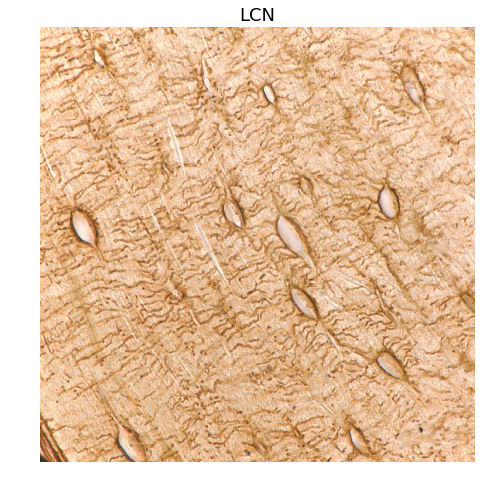

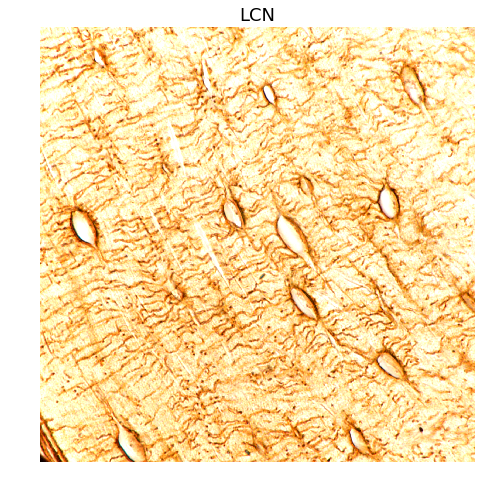

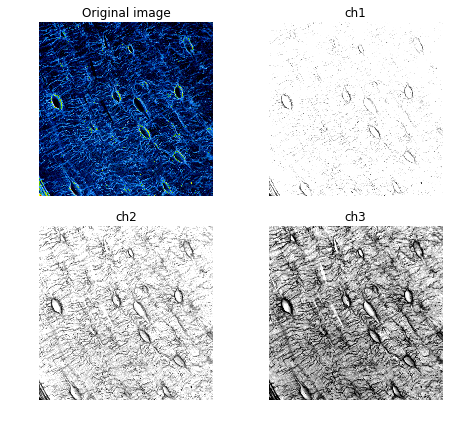

In [6]:
image = imread('/Users/Charlie/Desktop/Young Silver Nitrate/JPEGs/MY9_silvernitrate_100x_1.jpg')

#Plot 
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(image,cmap='gray')
ax.set_axis_off()
plt.title("LCN",fontsize='18')
plt.show()

# Rescale image intensity so that we can see dim features.
image_rescale = rescale_intensity(image, in_range=(50, 200))

#Plot 
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(image_rescale,cmap='gray')
ax.set_axis_off()
plt.title("LCN",fontsize='18')
plt.show()


#Reconstruct
image = image_rescale
seed = np.copy(image)
mask = image

filled = reconstruction(seed, mask, method='erosion')

#parse filled channels
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(filled,cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(filled[:, :, 0], cmap='gray')
ax[1].set_title("ch1")

ax[2].imshow(filled[:, :, 1], cmap='gray')
ax[2].set_title("ch2")

ax[3].imshow(filled[:, :, 2], cmap='gray')
ax[3].set_title("ch3")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()



In [10]:
matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[img.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = rgb2gray(filled)

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1, adjustable='box-forced')
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0],
                         adjustable='box-forced')
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0],
                         adjustable='box-forced')
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

ValueError: Images of type float must be between -1 and 1.